# Stock Price Forecast

We are creating a simple model to forecast the price of a stock in 7 days and whether we should hold the stock or not.
We will be using Brownian Motion to model our forecast.

In [1]:
#Import Necessary Library
#conda install -c anaconda pandas-datareader (RUN THIS)
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Input Ticker
ticker = input('Input Stock Ticker: ')

Input Stock Ticker: TSLA


In [3]:
# Grab Data from Yahoo
data = pd.DataFrame()

data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2015-1-1')['Adj Close']

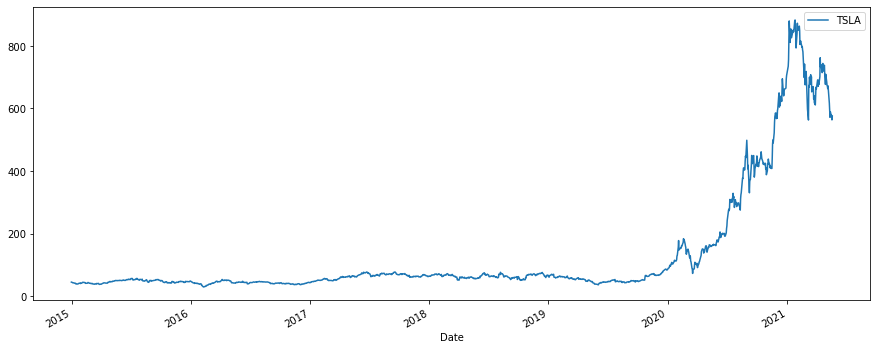

In [4]:
#Plot The Data
data.plot(figsize=(15,6))

In [5]:
#Compute the Logarithmic Returns
log_returns = np.log(1 + data.pct_change())
log_returns

,TSLA
Date,
2014-12-31,NaN
2015-01-02,-0.014036
2015-01-05,-0.042950
2015-01-06,0.005648
2015-01-07,-0.001563
...,...
2021-05-14,0.031085
2021-05-17,-0.022134
2021-05-18,0.001801


Text(0, 0.5, 'Frequency')

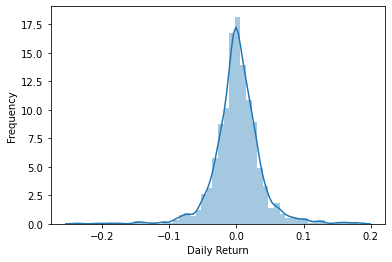

In [6]:
#Plot Ticker Logarithmic
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [7]:
#Calculate The Drift
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)

In [11]:
#Compute the Variance and Daily Returns
stdev = log_returns.std()
days = 50
trials = 5000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

In [12]:
#Simulating Price Paths
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

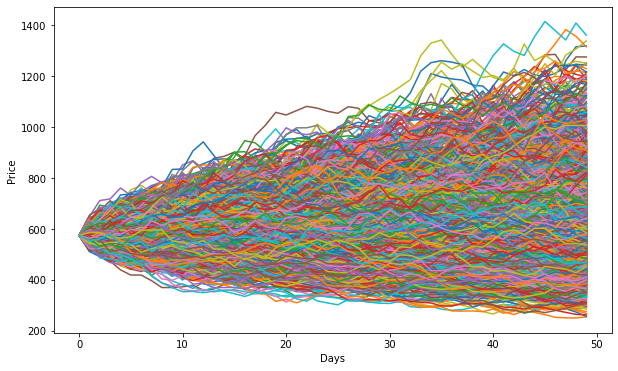

In [13]:
#Plotting the Price Paths
plt.figure(figsize=(10,6))
plt.plot(price_paths)
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [14]:
# Forecast
one_year_forecast=price_paths[-1]
price_now=price_paths[0]
next_day=price_paths[1]
next_week = price_paths[6]


In [15]:
#Input Investment
invest = input("How much would you like to invest?")
invested_money = int(invest)

#Calculate the forecasted price by next week
current_price=str(round(sum(price_now)/len(price_now),2))
next_day_price=str(round(sum(next_day)/len(next_day),2))
next_week_forecast=str(round(sum(next_week)/len(next_week),2))
next_week_forecast

How much would you like to invest?100000


'581.02'

In [36]:
#Calculate Estimated Profit for This week
stock_profit=((round(sum(next_week)/len(next_week),2)-round(sum(price_now)/len(price_now),2))/round(sum(price_now)/len(price_now),2))*invested_money
stock_profit_rounded=str(round(stock_profit,2))
stock_profit_rounded
percentage = round((stock_profit / invested_money)*100,2)
percentage


1.03

In [35]:
#Conditional Statement to check if investment is good or bad

if percentage > 0 and percentage <=2 :
    investment = "Great Investment!"
elif percentage > 2 :
    investment = "Amazing Investment!"
else :
    investment = "Terrible Investment!"

In [40]:
#Print Statements
print(ticker+' Stock Analysis')
print('The current price of '+ticker+ ' is: $'+current_price)
print('The forecasted price in 7 days is: $'+next_week_forecast)
print('The projected profit per $ ' +invest +' invested in a week is: $'+ stock_profit_rounded)
print('The expected return of this stock in a week is '+str(percentage)+'%. This is a '+investment)

TSLA Stock Analysis
The current price of TSLA is: $575.12
The forecasted price in 7 days is: $581.02
The projected profit per $ 100000 invested in a week is: $1025.87
The expected return of this stock in a week is 1.03%. This is a Great Investment!
